In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from matplotlib.pyplot import cm
from astropy import constants as const
from astropy import units as u
import numpy.ma as ma
from scipy.stats import mode
from scipy.misc import imread
import imageio
import matplotlib.patches as patches
from matplotlib.patches import Circle
from skimage import img_as_float, measure, feature
from skimage.transform import rotate as skrotate
from photutils.centroids import centroid_com
from itertools import combinations
import os
import matplotlib.patches as mpatches
import time
import cv2
import old_code as old
import image_separator_laura as ims
#import image_separator_yam as ims

The Stack part is missing


In [2]:
test = ims.sun_img('20120928004014Mh.jpg') #first one: mean_inten: 120

#test = ims.sun_img('20111114175814Mh.jpg') #mean_inten: 124
#test = ims.sun_img('20111114232414Mh.jpg')  #mean_inten: 124
#test = ims.sun_img('20111114175814Mh.jpg') #mean_inten: 124 - 125

#test = ims.sun_img('20111128001114Mh.jpg') #mean_inten: 125

#test = ims.sun_img('20120109000014Mh.jpg')
#test = ims.sun_img('20120109001014Mh.jpg')
#test = ims.sun_img('20120109002014Mh.jpg')
#test = ims.sun_img('20120109003014Mh.jpg')
#test = ims.sun_img('20120109004014Mh.jpg')
#test = ims.sun_img('20120109005014Mh.jpg')
#test = ims.sun_img('20120109010014Mh.jpg')
#test = ims.sun_img('20120109011014Mh.jpg')
#test = ims.sun_img('20120109020014Mh.jpg')
#test = ims.sun_img('20120109030014Mh.jpg')

#test = ims.sun_img('')

In [3]:

image_list = [ims.sun_img('20120109000014Mh.jpg'), ims.sun_img('20120109001014Mh.jpg'), ims.sun_img('20120109002014Mh.jpg'),ims.sun_img('20120109003014Mh.jpg'), ims.sun_img('20120109004014Mh.jpg'),ims.sun_img('20120109005014Mh.jpg'),ims.sun_img('20120109010014Mh.jpg'),ims.sun_img('20120109011014Mh.jpg'), ims.sun_img('20120109020014Mh.jpg'),ims.sun_img('20120109030014Mh.jpg')]

In [4]:
image_list

In [5]:
number_of_images = len(image_list)

In [6]:
print(number_of_images)

10


C:\Users\Lorenzo\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\Users\Lorenzo\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


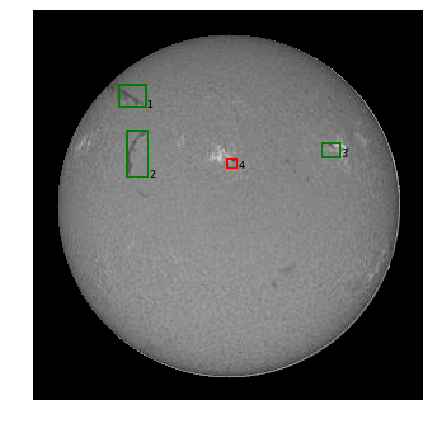

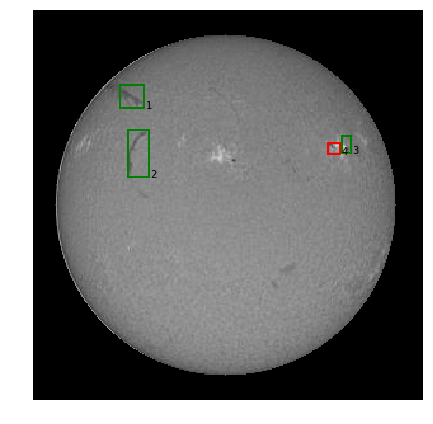

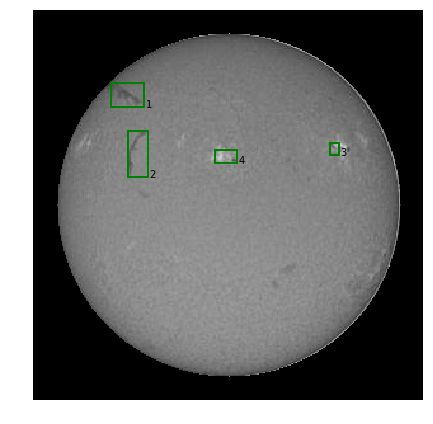

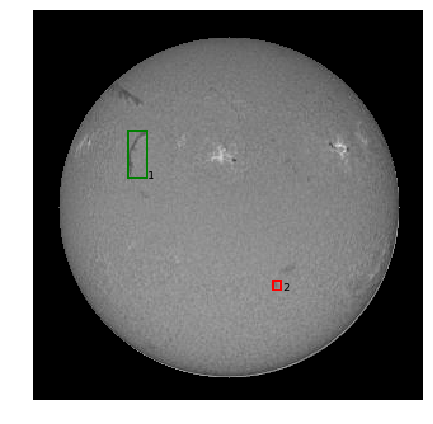

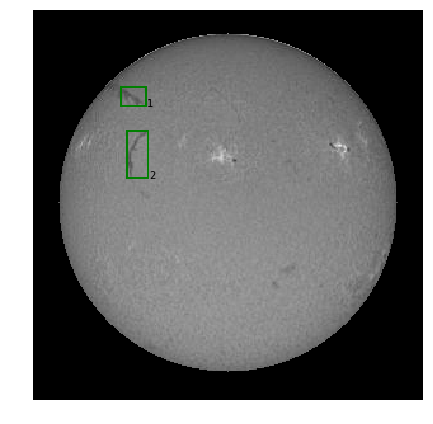

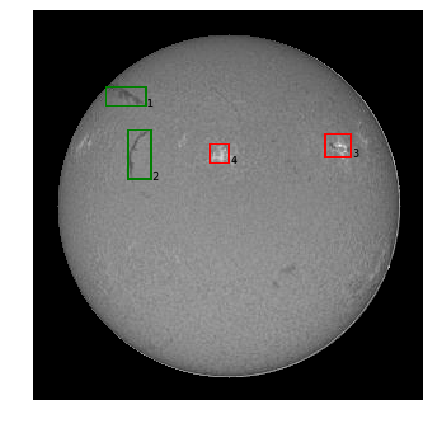

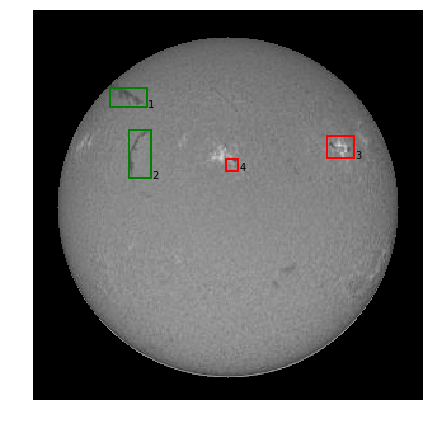

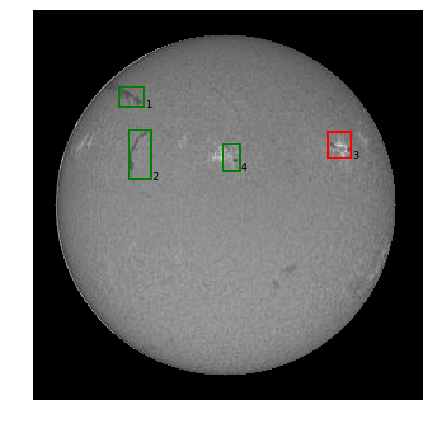

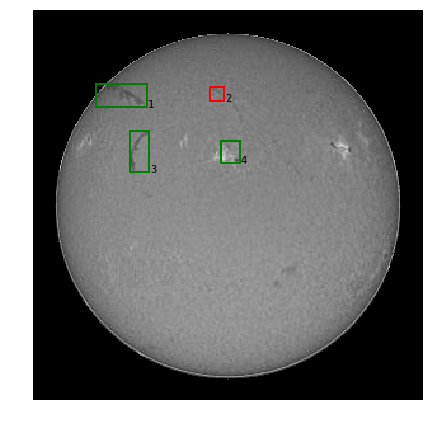

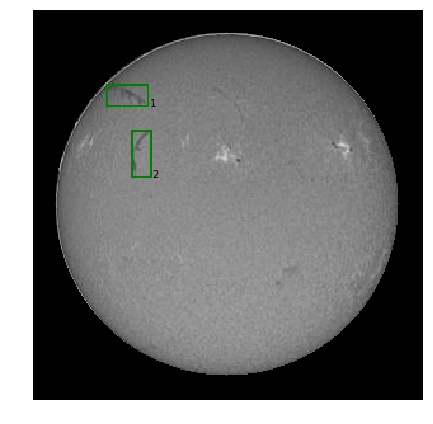

In [7]:
image_results = [ims.sun_img.detecting_filaments(i) for i in image_list]

In [8]:
image_results[9]

array([['Name', 'Center Coord.', 'Box', 'Intensity', 'Area',
        'Likely filament?', 'Original image'],
       ['1', (67.28217821782178, 74.91089108910892), (59, 58, 75, 90),
        102.54455445544555, 202, 'Probably yes', '20120109030014Mh.jpg'],
       ['2', (110.34615384615384, 81.98717948717949), (95, 77, 131, 92),
        113.1025641025641, 156, 'Probably yes', '20120109030014Mh.jpg']],
      dtype=object)

In [9]:
k = 0
coordinates = list()
for i in image_results:
    globals()["coord" + str(k)] = list()

    for j in i:
        if not type(j[1]) == str:
            globals()["coord" + str(k)].append(j[1])
    coordinates.append(globals()["coord" + str(k)])
    k = k+1

In [10]:
number_of_filaments = [len(i) for i in coordinates]

In [11]:
initial = np.argmax(number_of_filaments)
others = list(range(len(number_of_filaments)))

others.remove(initial)

In [12]:
m = 1
coincidences = list()

for i in coordinates[initial]:
    globals()["same" +str(initial)+ str(m)] = list()
    for j in others:
        n = 1
        for k in coordinates[j]:
            dist = np.sqrt((k[0]-i[0])**2+(k[1]-i[1])**2)

            if dist < 10:
                globals()["same" +str(initial)+ str(m)].append((j,n))
            n = n+1
  
    coincidences.append(globals()["same" +str(initial)+ str(m)])
    m = m+1
# First coordinate refers to the image, second coordinate to the tag of the filament in that image. 
# Note that the one that we have chosen as a reference (initial) doesn't appear

In [13]:
coincidences

[[(1, 1), (2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(1, 2), (2, 2), (3, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 3), (9, 2)],
 [(1, 4), (2, 3), (5, 3), (6, 3), (7, 3)],
 [(2, 4), (6, 4), (7, 4), (8, 4)]]

In [14]:
coincidences

[[(1, 1), (2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(1, 2), (2, 2), (3, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 3), (9, 2)],
 [(1, 4), (2, 3), (5, 3), (6, 3), (7, 3)],
 [(2, 4), (6, 4), (7, 4), (8, 4)]]

In [15]:
m = 0
iden_filaments = list()
for i in coincidences:
    globals()["filament" + str(m)]=list()
    globals()["filament" + str(m)].append(image_results[initial][m+1])    
    for j in i:
        globals()["filament" + str(m)].append(image_results[j[0]][j[1]])
    iden_filaments.append(globals()["filament" + str(m)])
    m = m+1


In [16]:
number_of_coincidences = [len(i) for i in iden_filaments]

In [17]:
number_of_coincidences

[9, 10, 6, 5]

In [18]:
# We get rid of the ones that are't detected half of the times
for i in iden_filaments:
    if len(i)-1< number_of_images/2:
        iden_filaments.remove(i)

In [19]:
counts = list()
for i in iden_filaments:
    n = 0
    for j in i:
          if j[5]== 'Probably yes':
                n = n+1
    counts.append(n)

In [20]:
for i in np.arange(len(counts)):
    if counts[i]<number_of_coincidences[i]/2:
        iden_filaments.remove(iden_filaments[i])


In [21]:
iden_filaments[0][4][6]

'20120109005014Mh.jpg'

In [22]:
areas = list()
images = list()
m = 0
for i in iden_filaments:
    globals()["areas" + str(m)] = list()
    globals()["image" + str(m)] = list()

    for j in i:
        globals()["areas" + str(m)].append(j[4])
        globals()["image" + str(m)].append(j[6])

    areas.append(globals()["areas" + str(m)])
    images.append(globals()["image" + str(m)])

    m = m+1

In [23]:
a = '20120109000014Mh.jpg'

In [24]:
a[:14]

'20120109000014'

In [25]:
images

[['20120109000014Mh.jpg',
  '20120109001014Mh.jpg',
  '20120109002014Mh.jpg',
  '20120109004014Mh.jpg',
  '20120109005014Mh.jpg',
  '20120109010014Mh.jpg',
  '20120109011014Mh.jpg',
  '20120109020014Mh.jpg',
  '20120109030014Mh.jpg'],
 ['20120109000014Mh.jpg',
  '20120109001014Mh.jpg',
  '20120109002014Mh.jpg',
  '20120109003014Mh.jpg',
  '20120109004014Mh.jpg',
  '20120109005014Mh.jpg',
  '20120109010014Mh.jpg',
  '20120109011014Mh.jpg',
  '20120109020014Mh.jpg',
  '20120109030014Mh.jpg']]

In [26]:
from datetime import datetime


datetime_object = datetime.strptime(a[:14], '%Y%m%d%H%M%S')

In [27]:
dates = list()
for i in np.arange(len(areas)):
    date =[datetime.strptime(a[:14], '%Y%m%d%H%M%S') for a in images[i]]
    dates.append(date)

In [28]:
dates

[[datetime.datetime(2012, 1, 9, 0, 0, 14),
  datetime.datetime(2012, 1, 9, 0, 10, 14),
  datetime.datetime(2012, 1, 9, 0, 20, 14),
  datetime.datetime(2012, 1, 9, 0, 40, 14),
  datetime.datetime(2012, 1, 9, 0, 50, 14),
  datetime.datetime(2012, 1, 9, 1, 0, 14),
  datetime.datetime(2012, 1, 9, 1, 10, 14),
  datetime.datetime(2012, 1, 9, 2, 0, 14),
  datetime.datetime(2012, 1, 9, 3, 0, 14)],
 [datetime.datetime(2012, 1, 9, 0, 0, 14),
  datetime.datetime(2012, 1, 9, 0, 10, 14),
  datetime.datetime(2012, 1, 9, 0, 20, 14),
  datetime.datetime(2012, 1, 9, 0, 30, 14),
  datetime.datetime(2012, 1, 9, 0, 40, 14),
  datetime.datetime(2012, 1, 9, 0, 50, 14),
  datetime.datetime(2012, 1, 9, 1, 0, 14),
  datetime.datetime(2012, 1, 9, 1, 10, 14),
  datetime.datetime(2012, 1, 9, 2, 0, 14),
  datetime.datetime(2012, 1, 9, 3, 0, 14)]]

In [29]:
from datetime import timedelta  

(dates[0][0]+timedelta(minutes=10)).strftime('%Y%m%d%H%M%S')


'20120109001014'

In [30]:
help(datetime.strftime)

Help on method_descriptor:

strftime(...)
    format -> strftime() style string.



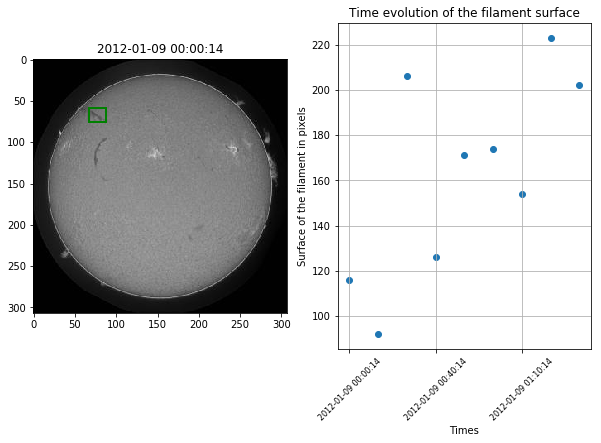

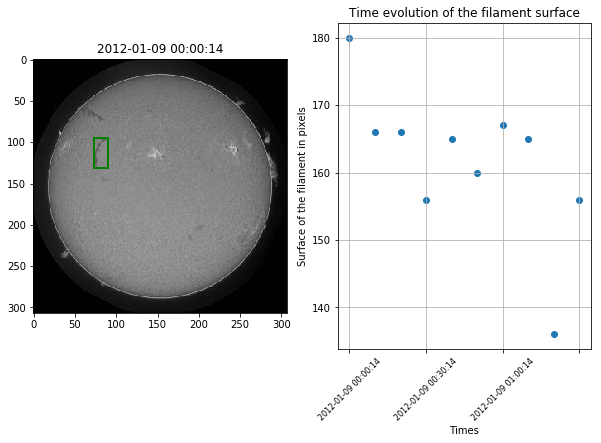

In [31]:
example_image = image_list[initial].original

for i in np.arange(len(areas)):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 6))


    ax1.imshow(example_image)
    minr, minc, maxr, maxc = iden_filaments[i][0][2]
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='green', linewidth=2)
    ax1.add_patch(rect)
    ax1.set_title(dates[i][initial])


    ax2.scatter(np.arange(len(areas[i])),areas[i])
    ax2.set_xticks(np.arange(0, len(areas[i]),3)) 
    ax2.grid()
    ax2.set_title('Time evolution of the filament surface')
    ax2.set_xlabel('Times')
    ax2.set_ylabel('Surface of the filament in pixels')

    ax2.set_xticklabels(dates[i][0:-1:3],rotation=45, fontsize=8)

    plt.show()

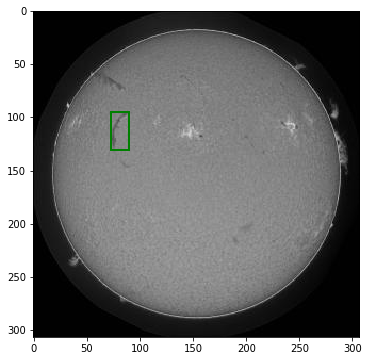

In [32]:
fig1, ax = plt.subplots(figsize=(10, 6))
plt.imshow(example_image)
minr, minc, maxr, maxc = iden_filaments[i][0][2]
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='green', linewidth=2)
ax.add_patch(rect)
plt.show()

In [33]:
rect

C:\Users\Lorenzo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


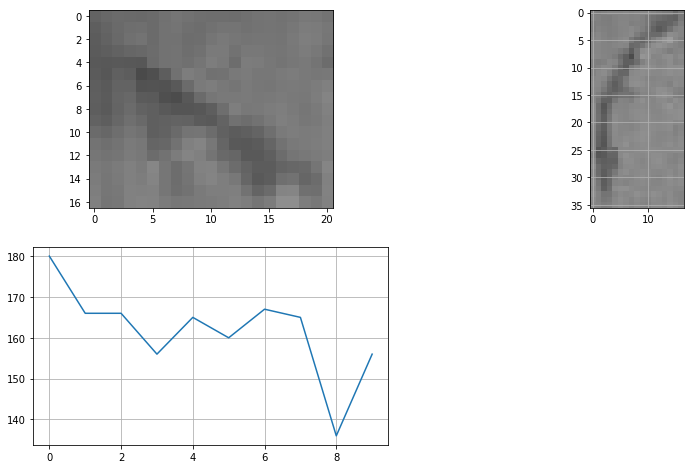

In [34]:

fig1562 = plt.figure(figsize=(14,8))

for i in np.arange(len(areas)):
    minr, minc, maxr, maxc = iden_filaments[i][0][2]
    box = example_image[minr:minr+maxr - minr,minc:minc+maxc - minc]
    dates =[datetime.strptime(a[:14], '%Y%m%d%H%M%S') for a in images[i]]

    plt.subplot(2, len(areas), i+1)
    plt.imshow(box)
    plt.subplot(2, len(areas), i+2)
    plt.plot(np.arange(len(areas[i])),areas[i])
    plt.grid()

plt.show()

In [35]:
iden_filaments[0][0][2]

(59, 67, 76, 88)